In [1]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

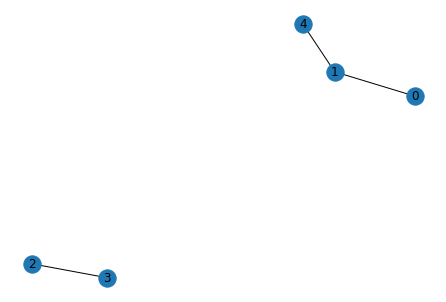

In [18]:
G = nx.erdos_renyi_graph(5, 0.4)
nx.draw_spring(G, with_labels=True)


In [45]:
# initiating all nodes to be susceptible

status_array = dict(G.nodes(data='status', default=0))
nx.set_node_attributes(G, status_array, 'status')
exposed_array = dict(G.nodes(data='exposed_time', default=0))
nx.set_node_attributes(G, exposed_array, 'exposed_time')
infectious_array = dict(G.nodes(data='infectious_time', default=0))
nx.set_node_attributes(G, infectious_array, 'infectious_time')

In [46]:
G.nodes[0]

{'status': 0, 'exposed_time': 0, 'infectious_time': 0}

# Equations for the SEIR model

## $$ \frac{\mathrm{d}S_i}{\mathrm{d}t} = -\beta_iS_i $$
## $$ \frac{\mathrm{d}E_i}{\mathrm{d}t} = \beta_iS_i - \alpha E_i $$
## $$ \frac{\mathrm{d}I_i}{\mathrm{d}t} = \alpha E_i - \gamma I_i $$
## $$ \frac{\mathrm{d}R_i}{\mathrm{d}t} = \gamma I_i $$


## where $$\beta_i = \sum_{j} \beta G_{ij} I_j$$ 

## Here $ \beta $ denotes the rate of infection. $\alpha$ denotes the rate at which exposed people become infectious. $\gamma$ denotes the recovery rate.

## To implement the above equations in an individual based model, we use the following rules.

## A susceptible node $i$ gets infected according to ~ $Binomial(1-e^{-\beta_i})$.

## An exposed node $i$ becomes infectious according to ~ $Binomial(1-e^{-\alpha t_{exposed}})$, where $t_{exposed}$ is the time since the node got exposed.

## An infectious node $i$ recovers or dies according to ~ $Binomial(1-e^{-\gamma t_{infectious}})$, where $t_{infectious}$ is the time since the node became infectious.

# Implementing the SEIR model
## status : 0 - susceptible (default), 1 - infectious, 2 - exposed, 3 - recovered 
## params = {alpha,beta,gamma}

In [ ]:
def SEIR_model(, iteration_num, graph_list, node_count, params_open, params_lockdown):

    graph = graph_list[-1]

    for _ in range(iteration_num):

        for node in graph:

            # when the current node is susceptible
            if graph.nodes[node][status]==0:
                num_inf_neighbor = len([v for v in graph.neighbors(node) if graph.nodes[v]['status'] == 1])
                if np.random.random_sample() < 1 - np.exp(-params[1]*num_inf_neighbor):
                    graph.nodes[node][status] = 2


            # when the current node is exposed
            elif graph.nodes[node][status]==2:
                if np.random.random_sample() < 1 - np.exp(-params[0]*graph.nodes[node]['exposed_time']):
                    graph.nodes[node][status] = 1
                    graph.nodes[node]['exposed_time'] = 0
                else:
                    graph.nodes[node]['exposed_time'] += 1

            # when the current node is infectious        
            elif graph.nodes[node][status]==1:
                if np.random.random_sample() < 1 - np.exp(-params[2]*graph.nodes[node]['infectious_time']):
                    graph.nodes[node][status] = 3
                    graph.nodes[node]['infectious_time'] = 0
                else:
                    graph.nodes[node]['infectious_time'] += 1

        graph_list.append(graph)

    return graph_list

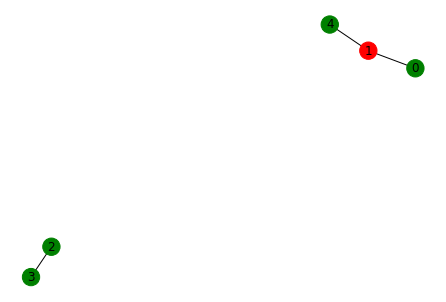

In [30]:
color_map = []
for node in G:
    if G.nodes[node]['status']==2:
        color_map.append('blue')
    elif G.nodes[node]['status']==1:
        color_map.append('red')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map,with_labels=True)